In [1]:
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
img_index = 1000
print(y_train[img_index])

0


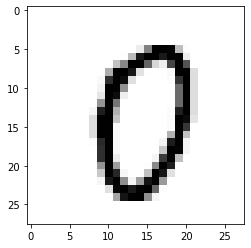

In [5]:
plt.imshow(X_train[img_index], cmap = 'Greys')
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the arrays to 4-dims so that it can work with keras API
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [8]:
# Making sure that the values are float so that we get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
# Normalizing the RGB codes by dividing it with max RGB value
X_train /= 255
X_test /= 255

In [10]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [13]:
# Using sequential model from keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [15]:
# Creating a sequential model and adding the layers
model = Sequential()
model.add(Conv2D(28,kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
# Flattening the 2D array for a fully connected layers
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))